# COS738 - 2022/1 - Busca e Mineração de Texto
## Aprenda a processar um documento XML
### Aluno:

- Pedro Tubenchlak Boechat - 119065050

#### Observação: o código desenvolvido para a tarefa é localizado ao fim do notebook, na seção [Aprendizado da Detecção de Codificação](#scrollTo=iADHGYaJoRqa).
<hr>

Este programa aprende a separar arquivos na CP Latin 1 e UTF-8


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Criar os arquivos temporários

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
FOLDERIN = "/content/drive/MyDrive/datasets/Folha/"
FOLDERTEMP = FOLDERIN+"Minis/"
FILEIN = "CETENFolha-1.0"
FILEOUTEXT = ".temp"

CODEPAGES = ["cp1252","utf-8","utf-32","utf-16","latin_1"]

SIZEMINIFILE = 50 # linhas por arquivo
TOTALFILES = 1000 # número de arquivos

In [ ]:
import os

os.makedirs(FOLDERTEMP, exist_ok=True)
print(f"The new directory {FOLDERTEMP} is created!")

The new directory /content/drive/MyDrive/datasets/Folha/Minis/ is created!


In [ ]:
f = open(FOLDERIN+FILEIN,"r",encoding="latin_1")

print(f.encoding)

ff = {}

lcounter = 0
fcounter = 0
try:
  for line in f:
    if lcounter % SIZEMINIFILE == 0: # if it is a new file
      for cps in CODEPAGES: # open all files
        ff[cps] = open(FOLDERTEMP+cps+ 
              str(fcounter)+FILEOUTEXT,
              "w", encoding=cps)
    cleantext = BeautifulSoup(line, "lxml").text # Limpa HTML
    for cps in CODEPAGES: # write in all files
      ff[cps].write(cleantext)
    lcounter += 1 # a new line done
    if lcounter % SIZEMINIFILE == 0: # lines enough
      if fcounter % 11 == 0 : 
        print(fcounter, lcounter) 
      for cps in CODEPAGES: # close all files
        ff[cps].close()
      fcounter += 1 # it is a new file
    if fcounter> TOTALFILES: # it is ok of files
      print("Breaking...")
      break
finally:
  for cps in CODEPAGES:
    ff[cps].close()

print("End... Total set of files {fcounter}")

latin_1
0 50
11 600
22 1150
33 1700
44 2250
55 2800
66 3350
77 3900
88 4450
99 5000
110 5550
121 6100
132 6650
143 7200
154 7750
165 8300
176 8850
187 9400
198 9950
209 10500
220 11050
231 11600
242 12150
253 12700
264 13250
275 13800
286 14350
297 14900
308 15450
319 16000
330 16550
341 17100
352 17650
363 18200
374 18750
385 19300
396 19850
407 20400
418 20950
429 21500
440 22050
451 22600
462 23150
473 23700
484 24250
495 24800
506 25350
517 25900
528 26450
539 27000
550 27550
561 28100
572 28650
583 29200
594 29750
605 30300
616 30850
627 31400
638 31950
649 32500
660 33050
671 33600
682 34150
693 34700
704 35250
715 35800
726 36350
737 36900
748 37450
759 38000
770 38550
781 39100
792 39650
803 40200
814 40750
825 41300
836 41850
847 42400
858 42950
869 43500
880 44050
891 44600
902 45150
913 45700
924 46250
935 46800
946 47350
957 47900
968 48450
979 49000
990 49550
Breaking...
End... Total set of files {fcounter}


# Aprendizado de Máquina

In [ ]:
from glob import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
import matplotlib.pyplot as plt


In [ ]:

AROW = (1,257)


## Função que lê byte a byte (geradora)

In [ ]:
def read_chunk(file_object, chunk_size=1):
    while True:
        file =  file_object.read(chunk_size)
        if not file:
            break
        yield file

## Preenche a matriz numpy (não precisamos do Pandas aqui)

In [ ]:
array = np.zeros(AROW,float)

allfiles = glob(FOLDERTEMP+"*")

i = 0
count = 0 
for file in allfiles:
  if count % 11 == 0:
    print(f"Reading file {file}")
  count += 1
  for j in range(len(CODEPAGES)):
    if file.find(CODEPAGES[j]) > -1:
      array[i,0] = j
  with open(file,"rb") as f:
      for byte in read_chunk(f,1):
          number = int.from_bytes(byte,"big")
          array[i,number+1] += 1
  if file != allfiles[-1]:
      array = np.r_[array,np.zeros(AROW,float)]
      i += 1



Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-32756.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/latin_1594.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/latin_1417.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-32222.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-32482.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-8912.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/cp1252871.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-32577.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/latin_1748.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/cp1252722.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-16268.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/cp1252856.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-32187.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-1

In [ ]:
for i in range(len(array)):
  print(f"{array[i,0]}",end=", ")

2.0, 4.0, 1.0, 1.0, 4.0, 3.0, 3.0, 1.0, 0.0, 3.0, 3.0, 4.0, 0.0, 0.0, 4.0, 0.0, 1.0, 4.0, 3.0, 2.0, 4.0, 1.0, 4.0, 1.0, 3.0, 0.0, 2.0, 1.0, 4.0, 4.0, 2.0, 3.0, 4.0, 2.0, 1.0, 1.0, 2.0, 4.0, 4.0, 0.0, 1.0, 3.0, 4.0, 0.0, 2.0, 0.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 1.0, 1.0, 1.0, 2.0, 4.0, 2.0, 0.0, 3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 0.0, 3.0, 0.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 4.0, 3.0, 0.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 0.0, 4.0, 0.0, 4.0, 2.0, 3.0, 1.0, 3.0, 1.0, 1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 3.0, 0.0, 3.0, 0.0, 4.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 4.0, 3.0, 4.0, 4.0, 0.0, 2.0, 1.0, 0.0, 1.0, 3.0, 4.0, 0.0, 0.0, 1.0, 2.0, 4.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 1.0, 2.0, 0.0, 0.0, 2.0, 4.0, 0.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0, 3.0, 4.0, 3.0, 0.0, 0.0, 4.0, 0.0, 4.0, 3.0, 4.0, 2.0, 0.0, 1.0, 1.0, 4.0, 3.0, 1.0, 3.0, 1.0, 1.0, 

In [ ]:
for row in array:
  s = sum(row[1:])
  if s > 0:
      row[1:] =  100 * row[1:] / s

## Prepara o data set de treinamento e teste

In [ ]:
y = array[:,0]
x = array[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)



In [ ]:
print("Train data")
for x in x_train[:20]:
  print(x)
print("\n"*3)
print("Test data")
print(y)

Train data
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          2.24014337  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         17.60752688  0.          0.          0.
  0.          0.          0.04480287  0.          0.1344086   0.1344086
  0.          0.          1.03046595  0.17921147  0.71684588  0.
  0.          0.          0.          0.04480287  0.          0.
  0.          0.          0.04480287  0.          0.          0.
  0.          0.          0.          0.          0.          0.58243728
  0.17921147  0.53763441  0.17921147  0.17921147  0.22401434  0.04480287
  0.08960573  0.2688172   0.04480287  0.          0.31362007  0.49283154
  0.04480287  0.31362007  0.1344086   0.04480287  0.31362007  0.31362007
  0.22401434  0.08960573  0.1344086   0.

## Árvores de Decisão

Decision Tree


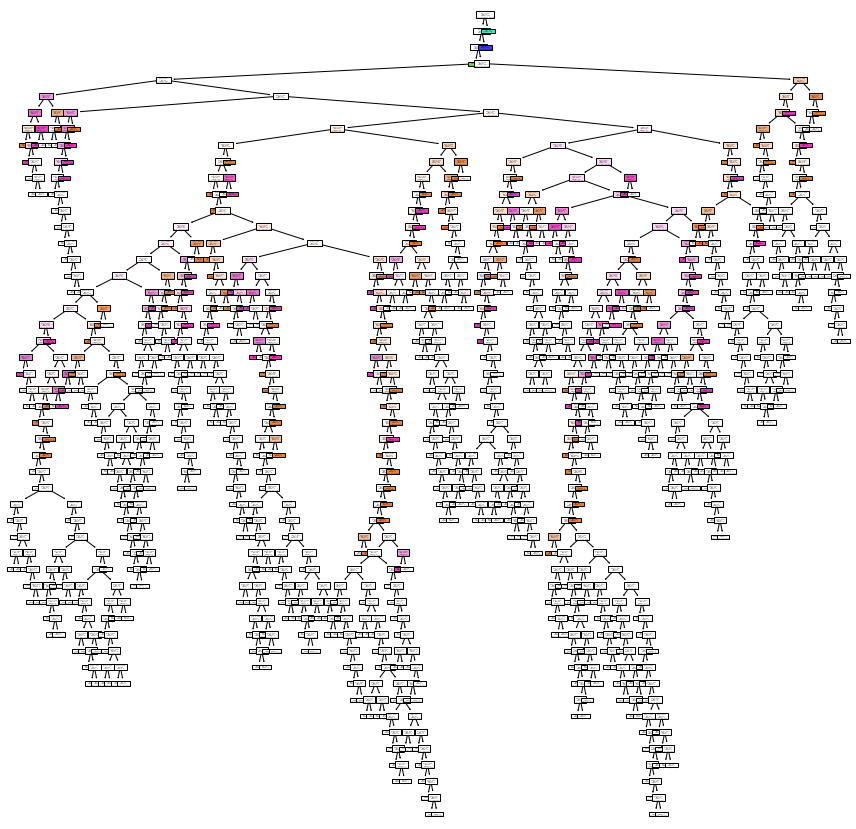

Accuracy:  0.655792276964048
Confusion Matrix:
  [[ 68   0   0   0 226]
 [  0 327   0   0   0]
 [  0   0 277   0   0]
 [  0   0   0 292   0]
 [291   0   0   0  21]]


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Decision Tree")
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)
plt.show()

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

## *Random Forest*

In [ ]:
print("Random Forest")
rtc = ensemble.RandomForestClassifier(100)
rtc = rtc.fit(x_train,y_train)
y_pred = rtc.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

Random Forest
Accuracy:  0.655792276964048
Confusion Matrix:
  [[ 57   0   0   0 237]
 [  0 327   0   0   0]
 [  0   0 277   0   0]
 [  0   0   0 292   0]
 [280   0   0   0  32]]


## SVM - *Support Vector Machine*

In [ ]:

print("SVM")
svmm = svm.LinearSVC()
svmm = svmm.fit(x_train,y_train)
y_pred = svmm.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))



SVM
Accuracy:  0.7916111850865513
Confusion Matrix:
  [[292   0   0   0   2]
 [  0 327   0   0   0]
 [  0   0 277   0   0]
 [  0   0   0 292   0]
 [311   0   0   0   1]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn import neighbors


In [ ]:
print("KNN")
knnm = neighbors.KNeighborsClassifier()
knnm = knnm.fit(x_train,y_train)
y_pred = knnm.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

KNN
Accuracy:  0.7043941411451398
Confusion Matrix:
  [[ 79   0   0   0 215]
 [  1 326   0   0   0]
 [  0   0 277   0   0]
 [  0   0   0 292   0]
 [228   0   0   0  84]]


# Aprendizado da Detecção de Codificação

## Questão 1
Realizada acima, editando o código original.

## Questão 2

In [ ]:
FOLDERIN = "/content/drive/MyDrive/datasets/Folha/"
FOLDERTEMP = FOLDERIN+"Minis2/"
FILEIN = "CETENFolha-1.0"
FILEOUTEXT = ".temp"

CODEPAGES = ["cp1252","utf-8","utf-32","utf-16"]

SIZEMINIFILE = 50 # linhas por arquivo
TOTALFILES = 1000 # número de arquivos

In [ ]:
os.makedirs(FOLDERTEMP, exist_ok=True)
print(f"The new directory {FOLDERTEMP} is created!")

In [ ]:
f = open(FOLDERIN+FILEIN,"r",encoding="cp1252")

print(f.encoding)

ff = {}

lcounter = 0
fcounter = 0
try:
  for line in f:
    if lcounter % SIZEMINIFILE == 0: # if it is a new file
      for cps in CODEPAGES: # open all files
        ff[cps] = open(FOLDERTEMP+cps+ 
              str(fcounter)+FILEOUTEXT,
              "w", encoding=cps)
    cleantext = BeautifulSoup(line, "lxml").text # Limpa HTML
    for cps in CODEPAGES: # write in all files
      ff[cps].write(cleantext)
    lcounter += 1 # a new line done
    if lcounter % SIZEMINIFILE == 0: # lines enough
      if fcounter % 11 == 0 : 
        print(fcounter, lcounter) 
      for cps in CODEPAGES: # close all files
        ff[cps].close()
      fcounter += 1 # it is a new file
    if fcounter> TOTALFILES: # it is ok of files
      print("Breaking...")
      break
finally:
  for cps in CODEPAGES:
    ff[cps].close()

print("End... Total set of files {fcounter}")

cp1252
0 50
11 600
22 1150
33 1700
44 2250
55 2800
66 3350
77 3900
88 4450
99 5000
110 5550
121 6100
132 6650
143 7200
154 7750
165 8300
176 8850
187 9400
198 9950
209 10500
220 11050
231 11600
242 12150
253 12700
264 13250
275 13800
286 14350
297 14900
308 15450
319 16000
330 16550
341 17100
352 17650
363 18200
374 18750
385 19300
396 19850
407 20400
418 20950
429 21500
440 22050
451 22600
462 23150
473 23700
484 24250
495 24800
506 25350
517 25900
528 26450
539 27000
550 27550
561 28100
572 28650
583 29200
594 29750
605 30300
616 30850
627 31400
638 31950
649 32500
660 33050
671 33600
682 34150
693 34700
704 35250
715 35800
726 36350
737 36900
748 37450
759 38000
770 38550
781 39100
792 39650
803 40200
814 40750
825 41300
836 41850
847 42400
858 42950
869 43500
880 44050
891 44600
902 45150
913 45700
924 46250
935 46800
946 47350
957 47900
968 48450
979 49000
990 49550
Breaking...
End... Total set of files {fcounter}


In [ ]:
array = np.zeros(AROW,float)

allfiles = glob(FOLDERTEMP+"*")

i = 0
count = 0 
for file in allfiles:
  if count % 11 == 0:
    print(f"Reading file {file}")
  count += 1
  for j in range(len(CODEPAGES)):
    if file.find(CODEPAGES[j]) > -1:
      array[i,0] = j
  with open(file,"rb") as f:
      for byte in read_chunk(f,1):
          number = int.from_bytes(byte,"big")
          array[i,number+1] += 1
  if file != allfiles[-1]:
      array = np.r_[array,np.zeros(AROW,float)]
      i += 1

Reading file /content/drive/MyDrive/datasets/Folha/Minis2/utf-32756.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/cp1252690.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/utf-16832.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/utf-32352.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/cp1252630.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/utf-8383.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/utf-16927.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/cp1252425.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/cp1252623.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/utf-16712.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/utf-32909.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/cp125286.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis2/utf-16380.temp
Reading file /content/drive/MyDrive/datasets/Folha/Mi

In [ ]:
for row in array:
  s = sum(row[1:])
  if s > 0:
      row[1:] =  100 * row[1:] / s

In [ ]:
y = array[:,0]
x = array[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init="random")
kmeans.fit(x_train, y_train)
y_pred = Kmean.predict(x_test)
print(f"Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.24459234608985025
Confusion Matrix:
  [[294   0   0   0]
 [  1   0   0 296]
 [  0 299   0   0]
 [  0   0 312   0]]


## Questão 3

In [ ]:
FOLDERIN = "/content/drive/MyDrive/datasets/Spain/"
FOLDERTEMP = FOLDERIN+"Minis/"
FILEIN = "donquijote.txt"
FILEOUTEXT = ".temp"

CODEPAGES = ["cp1252","utf-8","utf-32","utf-16"]

SIZEMINIFILE = 50 # linhas por arquivo
TOTALFILES = 1000 # número de arquivos

In [ ]:
os.makedirs(FOLDERTEMP, exist_ok=True)
print(f"The new directory {FOLDERTEMP} is created!")

The new directory /content/drive/MyDrive/datasets/Spain/Minis/ is created!


In [ ]:
import requests
with open(FOLDERIN+FILEIN, mode="wb") as f:
  f.write(requests.get("https://www.gutenberg.org/files/2000/2000-0.txt").content)

In [ ]:
f = open(FOLDERIN+FILEIN,"r",encoding="utf-8")

print(f.encoding)

ff = {}

lcounter = 0
fcounter = 0
try:
  for line in f:
    if lcounter % SIZEMINIFILE == 0: # if it is a new file
      for cps in CODEPAGES: # open all files
        ff[cps] = open(FOLDERTEMP+cps+ 
              str(fcounter)+FILEOUTEXT,
              "w", encoding=cps)
    for cps in CODEPAGES: # write in all files
      ff[cps].write(line[1:])
    lcounter += 1 # a new line done
    if lcounter % SIZEMINIFILE == 0: # lines enough
      if fcounter % 11 == 0 : 
        print(fcounter, lcounter) 
      for cps in CODEPAGES: # close all files
        ff[cps].close()
      fcounter += 1 # it is a new file
    if fcounter> TOTALFILES: # it is ok of files
      print("Breaking...")
      break
finally:
  for cps in CODEPAGES:
    ff[cps].close()

print("End... Total set of files {fcounter}")

utf-8
0 50
11 600
22 1150
33 1700
44 2250
55 2800
66 3350
77 3900
88 4450
99 5000
110 5550
121 6100
132 6650
143 7200
154 7750
165 8300
176 8850
187 9400
198 9950
209 10500
220 11050
231 11600
242 12150
253 12700
264 13250
275 13800
286 14350
297 14900
308 15450
319 16000
330 16550
341 17100
352 17650
363 18200
374 18750
385 19300
396 19850
407 20400
418 20950
429 21500
440 22050
451 22600
462 23150
473 23700
484 24250
495 24800
506 25350
517 25900
528 26450
539 27000
550 27550
561 28100
572 28650
583 29200
594 29750
605 30300
616 30850
627 31400
638 31950
649 32500
660 33050
671 33600
682 34150
693 34700
704 35250
715 35800
726 36350
737 36900
748 37450
759 38000
End... Total set of files {fcounter}


In [ ]:
array = np.zeros(AROW,float)

allfiles = glob(FOLDERTEMP+"*")

i = 0
count = 0 
for file in allfiles:
  if count % 11 == 0:
    print(f"Reading file {file}")
  count += 1
  for j in range(len(CODEPAGES)):
    if file.find(CODEPAGES[j]) > -1:
      array[i,0] = j
  with open(file,"rb") as f:
      for byte in read_chunk(f,1):
          number = int.from_bytes(byte,"big")
          array[i,number+1] += 1
  if file != allfiles[-1]:
      array = np.r_[array,np.zeros(AROW,float)]
      i += 1



Reading file /content/drive/MyDrive/datasets/Spain/Minis/utf-32756.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/utf-16274.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/cp125217.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/utf-3258.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/utf-8571.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/cp1252484.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/utf-16383.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/utf-16712.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/utf-16328.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/cp1252735.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/utf-8440.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/utf-16623.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/utf-169.temp
Reading file /content/drive/MyDrive/datasets/Spain/Minis/cp1252725.tem

In [ ]:
for row in array:
  s = sum(row[1:])
  if s > 0:
      row[1:] =  100 * row[1:] / s

In [ ]:
y = array[:,0]
x = array[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
print("KNN Spanish")
knnm = neighbors.KNeighborsClassifier()
knnm = knnm.fit(x_train,y_train)
y_pred = knnm.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

KNN
Accuracy:  0.9901639344262295
Confusion Matrix:
  [[228   8   0   0]
 [  1 244   0   0]
 [  0   0 217   0]
 [  0   0   0 217]]


## Questão 4

In [ ]:
from sklearn.model_selection import GridSearchCV
print("KNN + GridSearch")
gs_classifier = neighbors.KNeighborsClassifier()
grid_param = {
  'n_neighbors': [i for i in range(1,21)]
}
gs_knn = GridSearchCV(estimator=gs_classifier, param_grid=grid_param, scoring='accuracy', cv=10)
gs_fit = gs_knn.fit(x_train,y_train)
y_pred = gs_fit.best_estimator_.predict(x_test)
print("Best estimator K:", gs_fit.best_estimator_.get_params()["n_neighbors"])
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

KNN + GridSearch
Best estimator K: 13
Accuracy:  0.9956284153005465
Confusion Matrix:
  [[232   4   0   0]
 [  0 245   0   0]
 [  0   0 217   0]
 [  0   0   0 217]]


In [ ]:
import pandas as pd   
gdf = pd.DataFrame.from_dict(gs_fit.cv_results_)[
    ["params", "mean_test_score", "std_test_score"]
]
gdf = gdf.sort_values('mean_test_score', ascending=False).reset_index(drop=True)
gdf

,params,mean_test_score,std_test_score
0,{'n_neighbors': 17},0.997185,0.003113
1,{'n_neighbors': 13},0.997185,0.003113
2,{'n_neighbors': 12},0.996718,0.003004
3,{'n_neighbors': 19},0.996716,0.003005
4,{'n_neighbors': 15},0.996716,0.003005
5,{'n_neighbors': 11},0.996251,0.002815
6,{'n_neighbors': 18},0.996246,0.002816
7,{'n_neighbors': 20},0.996246,0.002816
8,{'n_neighbors': 9},0.995314,0.002962
9,{'n_neighbors': 14},0.995310,0.002969
